## Full PATEGAN rewrite

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from models import dp_wgan, pate_gan
import numpy as np
import pandas as pd
import collections, time

In [3]:
# HYPERPARAMETERS
MODEL_NAME = 'PATEGAN' # Don't change this
DATASET_NAME = 'churn' # Choose either 'churn' or 'marketing' exactly!
TARGET_VARIABLE = 'Exited' # either 'Exited' or 'Response'
TRAIN_TEST_RATIO = 0.25
LEAKY = False # Put False for normal relu. The number indicates the amount of negative slope. Default is 0.01

# These seem to be good to tune from what I can tell from the github.
NUM_TEACHERS = 6
TARGET_EPSILON = 10
TARGET_DELTA = 1e-4
LEARNING_RATE = 1e-4

# Following defaults in the toolbox. Might not be crucial to tune these
BATCH_SIZE = 64
TEACHER_ITER = 5
STUDENT_ITER = 5
NUM_MOMENTS= 100
LAP_SCALE = 5e-4

In [4]:
# Read in data and do train test split
df = pd.read_csv(f'{DATASET_NAME}_processed.csv')
df_train, df_test = train_test_split(df, test_size=TRAIN_TEST_RATIO, random_state=42, stratify = df[TARGET_VARIABLE])

# Initialise logfile path
timestamp = int(time.time())
logfile = f'logs/log_{DATASET_NAME}_{MODEL_NAME}_{timestamp}_{TARGET_EPSILON}.csv'

In [5]:
# Grab x and y from the respective dataframes and convert to numpy arrays.
train_x = df_train.drop(columns=TARGET_VARIABLE).values
train_y = df_train[TARGET_VARIABLE].values
test_x = df_test.drop(columns=TARGET_VARIABLE).values
test_y = df_test[TARGET_VARIABLE].values

# Initialise scaler and use this to normalize the inputs.
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)


# Some misc variables for pategan 
data_columns = [col for col in df_train.columns if col != TARGET_VARIABLE]
class_ratios = df_train[TARGET_VARIABLE].sort_values().groupby(df_train[TARGET_VARIABLE]).size().values/train_x.shape[0]
input_dim = train_x.shape[1]
z_dim = int(input_dim / 4 + 1) if input_dim % 4 == 0 else int(input_dim / 4)
conditional = True

In [6]:
# Initialise hyperparams and do TRAINING
Hyperparams = collections.namedtuple(
        'Hyperarams',
        'batch_size num_teacher_iters num_student_iters num_moments lap_scale class_ratios lr')
Hyperparams.__new__.__defaults__ = (None, None, None, None, None, None, None)

model = pate_gan.PATE_GAN(LEAKY,logfile, input_dim, z_dim, NUM_TEACHERS, TARGET_EPSILON, TARGET_DELTA, conditional)
model.train(train_x, train_y, test_x, test_y, data_columns, scaler, DATASET_NAME, Hyperparams(batch_size=BATCH_SIZE, num_teacher_iters=TEACHER_ITER,
                                              num_student_iters=STUDENT_ITER, num_moments=NUM_MOMENTS,
                                              lap_scale=LAP_SCALE, class_ratios=class_ratios, lr=LEARNING_RATE))



Best Roc of 0.5910250350546024 found, saving....
Step :  0 Loss SD :  0.7180929113212753 Loss G :  0.7183818126947532 Epsilon :  0.10826340371976181 ROC_SCORE:  0.5910250350546024
Step :  10 Loss SD :  0.7019465335789457 Loss G :  0.6954782080105072 Epsilon :  0.2564013940552248 ROC_SCORE:  0.5891492067940308
Best Roc of 0.5913205692808208 found, saving....
Step :  20 Loss SD :  0.708902901283527 Loss G :  0.7148624066689666 Epsilon :  0.35520193023031116 ROC_SCORE:  0.5913205692808208
Best Roc of 0.595700791084438 found, saving....
Step :  30 Loss SD :  0.6945199786449303 Loss G :  0.7031657656207648 Epsilon :  0.43243396213898133 ROC_SCORE:  0.595700791084438
Step :  40 Loss SD :  0.7052230492246097 Loss G :  0.7198223681932581 Epsilon :  0.4982081181615183 ROC_SCORE:  0.5899025970501836
Step :  50 Loss SD :  0.6872856869858024 Loss G :  0.69586416779709 Epsilon :  0.5564923638816529 ROC_SCORE:  0.5872067723222083
Step :  60 Loss SD :  0.6894228899309376 Loss G :  0.706811779681954 E

Step :  610 Loss SD :  0.700398764452651 Loss G :  0.6703960838297021 Epsilon :  1.996394037197609 ROC_SCORE:  0.5626350009226194
Step :  620 Loss SD :  0.6894067689790444 Loss G :  0.6752151684595892 Epsilon :  2.013994037197609 ROC_SCORE:  0.5678268317448164
Step :  630 Loss SD :  0.6964080076974695 Loss G :  0.6756765724189009 Epsilon :  2.0315940371976087 ROC_SCORE:  0.5728203240712874
Step :  640 Loss SD :  0.6958032169865347 Loss G :  0.6765378423104316 Epsilon :  2.0489711524418155 ROC_SCORE:  0.5663131439217145
Step :  650 Loss SD :  0.6923929770410874 Loss G :  0.6771245139281735 Epsilon :  2.064971152441812 ROC_SCORE:  0.5670443321074501
Step :  660 Loss SD :  0.6969477220856892 Loss G :  0.6788552846763521 Epsilon :  2.080971152441808 ROC_SCORE:  0.568891050986808
Step :  670 Loss SD :  0.6873866782706866 Loss G :  0.6818335136897169 Epsilon :  2.0969711524418044 ROC_SCORE:  0.5712469373477309
Step :  680 Loss SD :  0.6903302481729314 Loss G :  0.6746397564217448 Epsilon :  

/home/yeeyang/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Step :  1190 Loss SD :  0.694149386914055 Loss G :  0.6779833156392725 Epsilon :  2.8402429102823246 ROC_SCORE:  0.5797730257672297
Step :  1200 Loss SD :  0.6894970138853458 Loss G :  0.675243299525383 Epsilon :  2.853042910282325 ROC_SCORE:  0.5536096126084078


KeyboardInterrupt: 

In [ ]:
# Optional: Look at model architectures
print(model.student_disc)
print(model.teacher_disc[0])
print(model.generator)

## Generate synthetic data using trained model, then save in CSV

In [27]:
# Helper functions for saving the synthetic data...
def update_array(indexes, cols = None):
    if cols: colsize = cols
    else: colsize = indexes.max() +1
    b = np.zeros((indexes.size, colsize))
    b[np.arange(indexes.size), indexes] = 1
    return b

def save_marketing():
    # Some fancy indexing to get the actual synthetic data..
    accepted = np.argmax(syn_save[:,16:21], axis=1)
    education = np.argmax(syn_save[:, 22:27], axis=1)
    marital = np.argmax(syn_save[:, 27:34], axis=1)
    country = np.argmax(syn_save[:, 34:], axis=1)

    syn_save[:,16:21] = update_array(accepted, cols=5)
    syn_save[:, 22:27] = update_array(education, cols=5)
    syn_save[:, 27:34] = update_array(marital, cols=7)
    syn_save[:, 34:] = update_array(country, cols=8)

    df1 = pd.DataFrame(syn_save, columns = df.columns.drop(TARGET_VARIABLE))
    df2 = pd.DataFrame(syn_y, columns = [TARGET_VARIABLE])
    df_save = pd.concat([df1,df2], axis =1)
    df_save.to_csv(f'synthetic_{MODEL_NAME}_{DATASET_NAME}_{TARGET_EPSILON}.csv')

def save_churn():
    geography = np.argmax(syn_save[:,8:11], axis=1)
    gender = np.argmax(syn_save[:,11:], axis=1)
    
    syn_save[:,8:11] = update_array(geography, cols=3)
    syn_save[:, 11:] = update_array(gender, cols=2)
    syn_save[:,4] = np.round(syn_save[:,4]) # num products
    syn_save[:,5] = np.round(np.clip(syn_save[:,5],0,1)) # Has card
    syn_save[:,6] = np.round(np.clip(syn_save[:,6],0,1)) # Is active


    df1 = pd.DataFrame(syn_save, columns = df.columns.drop(TARGET_VARIABLE))
    df2 = pd.DataFrame(syn_y, columns = [TARGET_VARIABLE])
    df_save = pd.concat([df1,df2], axis =1)
    df_save.to_csv(f'synthetic_{MODEL_NAME}_{DATASET_NAME}_{TARGET_EPSILON}.csv')


In [26]:
np.round(np.clip(syn_save[:,5],0,1)).min()

0.0

In [28]:
df_save = save_churn()

In [37]:
df_save

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,569.189810,40.029415,6.717890,89681.936477,2.0,1.0,1.0,130466.340459,0.0,0.0,1.0,0.0,1.0,0.0
1,570.501744,33.474992,8.674211,110469.707352,1.0,1.0,1.0,71928.116744,1.0,0.0,0.0,0.0,1.0,0.0
2,419.490332,51.890009,18.356562,200372.129774,0.0,0.0,1.0,264136.140441,0.0,0.0,1.0,0.0,1.0,1.0
3,542.538826,42.563155,8.338049,117159.416072,1.0,0.0,1.0,155246.459858,0.0,0.0,1.0,0.0,1.0,0.0
4,577.241597,42.062559,10.930599,89837.667759,1.0,0.0,1.0,137180.080401,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,594.765712,36.708907,6.737492,84549.090124,1.0,1.0,1.0,88441.888815,1.0,0.0,0.0,0.0,1.0,0.0
7496,533.535706,43.156655,10.432683,119125.835245,1.0,0.0,1.0,163115.984498,0.0,0.0,1.0,0.0,1.0,0.0
7497,563.589866,39.947245,6.797705,91301.876516,2.0,1.0,1.0,132893.947639,0.0,0.0,1.0,0.0,1.0,0.0
7498,586.354935,38.140655,8.512222,92579.078628,1.0,1.0,1.0,102529.715082,1.0,0.0,0.0,0.0,1.0,0.0


In [15]:
df_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [50]:
COL = 5
print(df_train.iloc[:,COL].value_counts())
print(df_save.iloc[:,COL].value_counts())

1    5304
0    2196
Name: HasCrCard, dtype: int64
0.0    5547
1.0    1953
Name: HasCrCard, dtype: int64


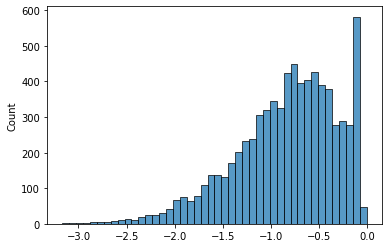

In [51]:
import seaborn as sns

sns.histplot(syn_x[:,COL])

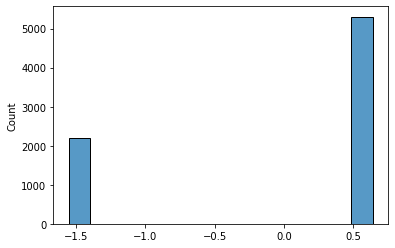

In [52]:
sns.histplot(train_x[:,COL])

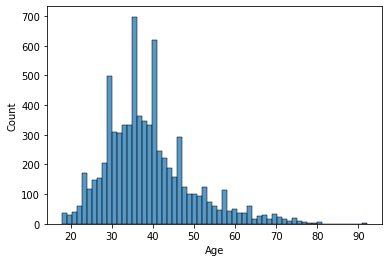

In [19]:
sns.histplot(df_train['Age'])

In [13]:
# Run this cell to generate data and save them.
syn_data = model.generate(train_x.shape[0], class_ratios)
syn_x, syn_y = syn_data[:, :-1], syn_data[:, -1]

# Make a copy for saving
syn_save = scaler.inverse_transform(syn_x)

# Save data to csv using functions
if DATASET_NAME == 'churn': save_churn()
else: save_marketing()

## Do classification using Neural Networks and look at ROC Score

In [41]:
# Train using Synthetic data, using simple neural network.
mlp = MLPClassifier((32,8), max_iter=1000, random_state=42)
mlp.fit(syn_x, syn_y)
pred_y = mlp.predict(test_x)

print('ROC Score', roc_auc_score(test_y, pred_y))
print('Accuracy', mlp.score(test_x,test_y))

ROC Score 0.523977249291754
Accuracy 0.4852


In [42]:
# Train using REAL data, using simple neural network.
mlp = MLPClassifier((32,8), max_iter=1000, random_state=42)
mlp.fit(train_x, train_y)
pred_y = mlp.predict(test_x)

print('ROC Score', roc_auc_score(test_y, pred_y))
print('Accuracy', mlp.score(test_x,test_y))
# Uitvoer van uitgevoerde code vanaf 7 jun. 2021 03:50
# 	Stream
# 		ROC Score 0.7530632082470008
# 		Accuracy 0.8754512635379061

ROC Score 0.7328967583990432
Accuracy 0.8564


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
# Initialise all models
classifier_names = ['MLP', 'RF', 'ADABOOST', 'DT', 'GauNB', 'BernNB', 'SVM', 'LogReg']
classifiers = [MLPClassifier((32,8), max_iter=1000, random_state=42), #MLP
               RandomForestClassifier(max_depth=2, random_state=42), #RF
               AdaBoostClassifier(n_estimators=50, random_state=42),
               DecisionTreeClassifier(random_state=42),
               GaussianNB(),
               BernoulliNB(),
               SVC(random_state=42),
               LogisticRegression(random_state=42)
]

In [ ]:
syn_clf_accuracy = []
syn_clf_roc_score = []
real_clf_accuracy = []
real_clf_roc_score = []

# Loop thru all classifiers.
for clf in classifiers:

    # Do synthetic
    clf.fit(syn_x, syn_y)
    pred_y = clf.predict(test_x)

    # compute score and append
    syn_clf_roc_score.append(roc_auc_score(test_y, pred_y))
    syn_clf_accuracy.append(clf.score(test_x,test_y))

    # Do real training data
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)

    # compute score and append
    real_clf_roc_score.append(roc_auc_score(test_y, pred_y))
    real_clf_accuracy.append(clf.score(test_x,test_y))

In [ ]:
score_df = pd.DataFrame({'Classifier Name':classifier_names,
                         'Accuracy on Synthetic':syn_clf_accuracy,
                         'ROC on Synthetic': syn_clf_roc_score,
                         'Accuracy on Real': real_clf_accuracy,
                         'ROC on Real': real_clf_roc_score,
                         })
score_df.to_csv('scores.csv') # Make into a csv that you can download and do computations!

In [ ]:
score_df

,Classifier Name,Accuracy on Synthetic,ROC on Synthetic,Accuracy on Real,ROC on Real
0,MLP,0.518051,0.612347,0.875451,0.753063
1,RF,0.850181,0.500000,0.851986,0.506024
2,ADABOOST,0.750903,0.545827,0.897112,0.750914
3,DT,0.514440,0.550674,0.803249,0.656013
4,GauNB,0.738267,0.622759,0.871841,0.636802
5,BernNB,0.790614,0.519556,0.781588,0.702824
6,SVM,0.850181,0.500000,0.879061,0.626161
7,LogReg,0.723827,0.658929,0.895307,0.715115
